In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("customer_seg.csv")

In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

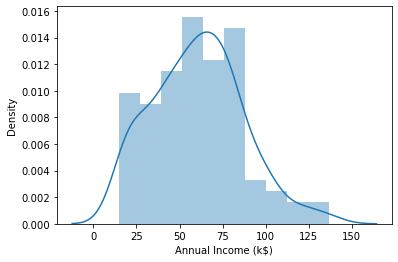

In [5]:
sns.distplot(df["Annual Income (k$)"])

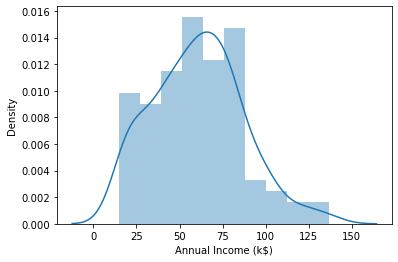

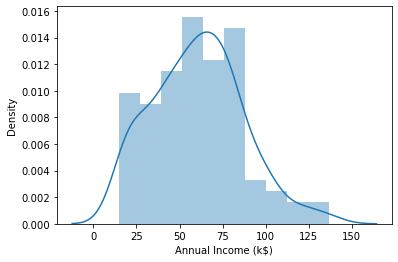

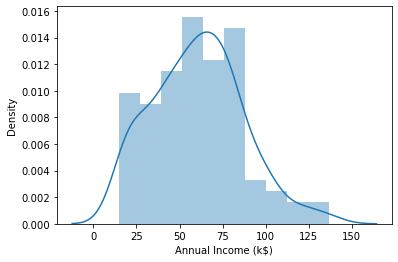

In [6]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df["Annual Income (k$)"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

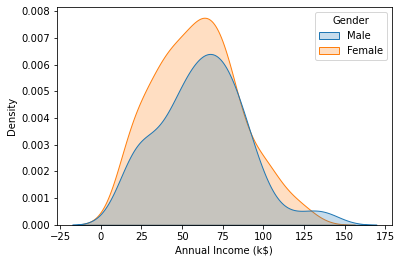

In [7]:
sns.kdeplot(df["Annual Income (k$)"],shade=True,hue=df["Gender"])

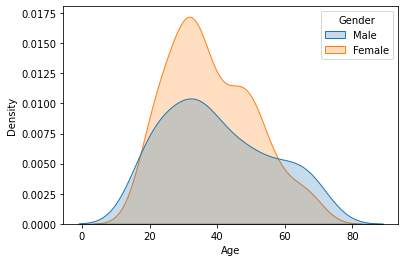

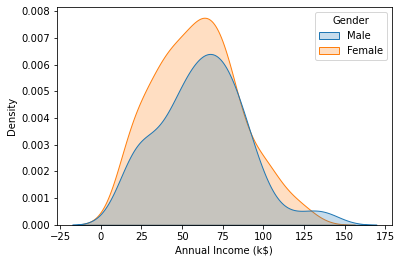

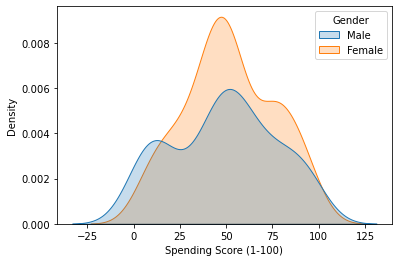

In [8]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df["Gender"])

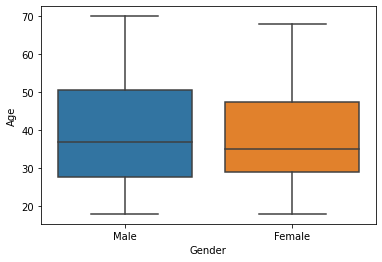

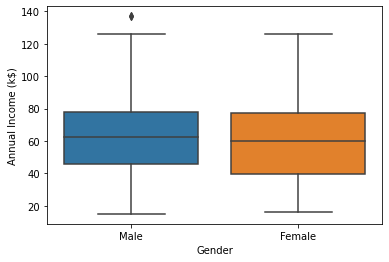

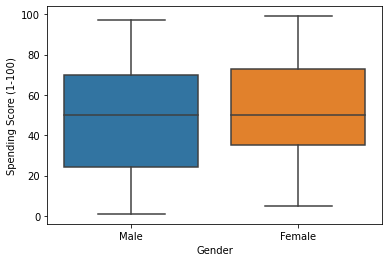

In [9]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x="Gender",y=df[i])

In [10]:
df["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate analysis


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

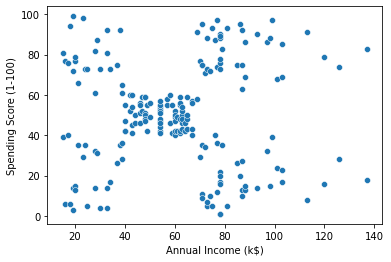

In [11]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

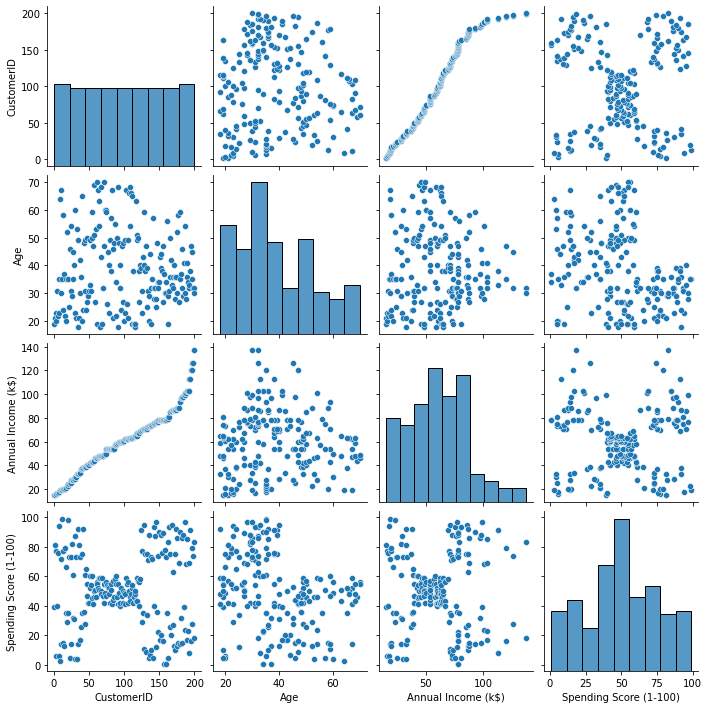

In [12]:
sns.pairplot(df)

In [13]:
#df=df.drop("CustomerID",axis=1)
 

In [14]:
df.groupby("Gender")['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
c=df.corr()

<AxesSubplot:>

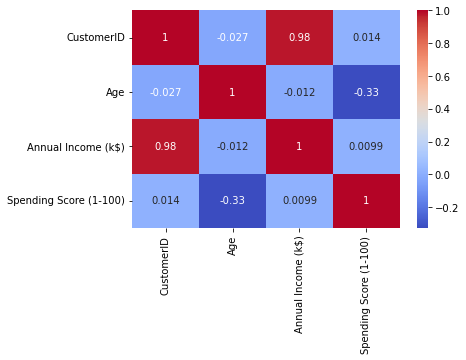

In [16]:
sns.heatmap(c,annot=True,cmap="coolwarm")

### Clustering Univariate Bivariate Multivariate

In [17]:
clustering1=KMeans(n_clusters=3)

In [18]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [19]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [20]:
df["Income cluster"]=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [21]:
df["Income cluster"].value_counts()

0    90
1    74
2    36
Name: Income cluster, dtype: int64

In [22]:
clustering1.inertia_

23517.330930930937

In [23]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [24]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8493.229304029304,
 5050.904761904762,
 3931.9880952380954,
 2836.104761904763,
 2190.0972210795744,
 1770.6341269841273]

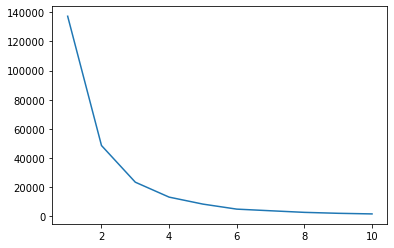

In [25]:
plt.plot(range(1,11),inertia_scores)

In [26]:
df.groupby("Income cluster")['Age', 'Spending Score (1-100)','Annual Income (k$)'].mean()

,Age,Spending Score (1-100),Annual Income (k$)
Income cluster,,,
0,38.722222,50.000000,67.088889
1,39.500000,50.229730,33.486486
2,37.833333,50.638889,99.888889


### Bivariate clustering

In [27]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0


In [28]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,88.200000,17.114286
4,25.727273,79.363636


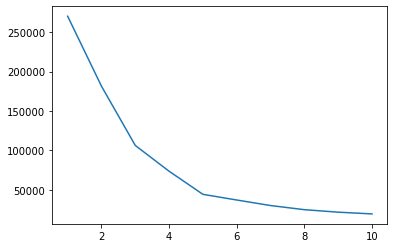

In [29]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

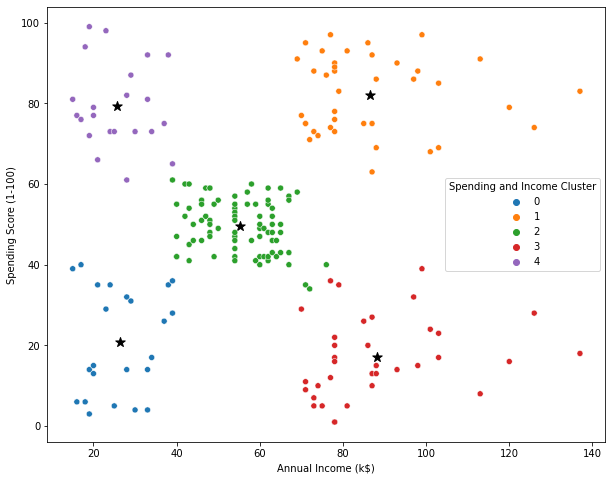

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x= "Annual Income (k$)", y='Spending Score (1-100)',hue="Spending and Income Cluster",palette='tab10')
plt.savefig('clustering_bivariate.png')

In [31]:
pd.crosstab(df["Spending and Income Cluster"],df["Gender"],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [32]:
df.groupby("Spending and Income Cluster")['Age', 'Spending Score (1-100)','Annual Income (k$)'].mean()

,Age,Spending Score (1-100),Annual Income (k$)
Spending and Income Cluster,,,
0,45.217391,20.913043,26.304348
1,32.692308,82.128205,86.538462
2,42.716049,49.518519,55.296296
3,41.114286,17.114286,88.200000
4,25.272727,79.363636,25.727273


#### Ideal - 3rd cluster which has high spending score and annual income 

### Multivariate clustering

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0


#### replace column gender to numerical values for easier analysis

In [36]:
dff=pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,1,0,0,1
1,2,21,15,81,1,4,0,1
2,3,20,16,6,1,0,1,0
3,4,23,16,77,1,4,1,0
4,5,31,17,40,1,0,1,0


In [37]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Spending and Income Cluster', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [38]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [39]:
dff=pd.DataFrame(scale.fit_transform(dff))

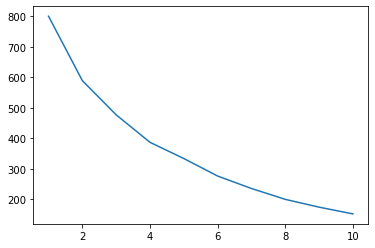

In [40]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,3
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,3


In [42]:
df.to_csv('clustering.csv')